### Link to the talk
[Here](https://www.youtube.com/watch?v=_H3aw6wkCv0&list=LL-zgNSIxT_4YM8ZZyzFKn-g)

In [8]:
!pipenv install sklearn

Installing sklearn…
Adding sklearn to Pipfile's [packages]…
✔ Installation Succeeded 
Pipfile.lock (f3e5e0) out of date, updating to (f007c7)…
Locking [dev-packages] dependencies…
Locking [packages] dependencies…
✔ Success! 
Updated Pipfile.lock (f3e5e0)!
Installing dependencies from Pipfile.lock (f3e5e0)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 77/77 — 00:00:14mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm


In [19]:
# !pipenv install matplotlib

Installing matplotlib…
Adding matplotlib to Pipfile's [packages]…
✔ Installation Succeeded 
Pipfile.lock (f007c7) out of date, updating to (37acff)…
Locking [dev-packages] dependencies…
Locking [packages] dependencies…
✔ Success! 
Updated Pipfile.lock (f007c7)!
Installing dependencies from Pipfile.lock (f007c7)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 74/74 — 00:00:11mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm


In [1]:
%matplotlib inline

In [2]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from IPython.core.debugger import set_trace
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [15]:
torchvision.__version__
torch.__version__
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

'0.5.0'

'1.4.0'

device(type='cpu')

### The Problem

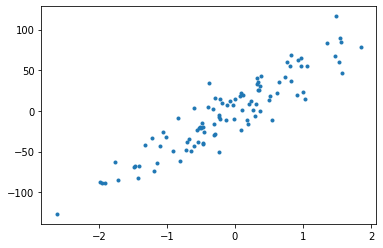

In [13]:
from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".");

### The Solution

In [14]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [16]:
class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [18]:
model = LinReg(n_features).to(DEVICE)  # <-- here you can set CPU/GPU
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


X, y = X.to(DEVICE), y.to(DEVICE)  # <-- here here you can set CPU/GPU

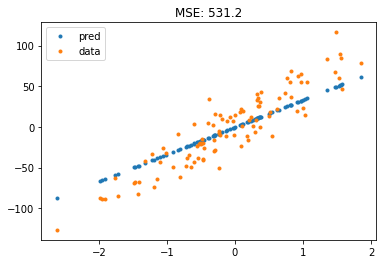

In [25]:
# Train step
model.train()  # <-- here
optimizer.zero_grad()

y_ = model(X)
loss = loss_fn(y_, y)

loss.backward()
optimizer.step()

# Eval
model.eval()  # <-- here
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();